<a href="https://colab.research.google.com/github/PraneelUJ/CS203_Lab_5/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
!pip install --upgrade augly -q
!pip install nlpaug -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 7.6 MB/s eta 0:00:00


In [3]:
from PIL import Image
import os
import random
import augly.image as imaugs

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
image_files = [f for f in os.listdir('/content/drive/MyDrive/cats') if f.endswith('.jpg')]
images = []
counter=0
cats_train=[]
cats_test=[]

for i in image_files:
    img_path = os.path.join('/content/drive/MyDrive/cats', i)
    img = Image.open(img_path)
    counter+=1
    if(counter<=56):
        img_array = np.array(img)
        cats_train.append(img_array)
    else:
        img_array=np.array(img)
        cats_test.append(img_array)


In [6]:
image_files = [f for f in os.listdir('/content/drive/MyDrive/dogs') if f.endswith('.jpg')]
images = []
counter=0
dogs_train=[]
dogs_test=[]

for i in image_files:
    img_path = os.path.join('/content/drive/MyDrive/dogs', i)
    img = np.array(Image.open(img_path))
    counter+=1
    if(counter<=56):
        img_array = np.array(img)
        dogs_train.append(img_array)
    else:
        img_array=np.array(img)
        dogs_test.append(img_array)

In [7]:
len(dogs_train),len(dogs_test),len(cats_train),len(cats_test)

(56, 14, 56, 14)

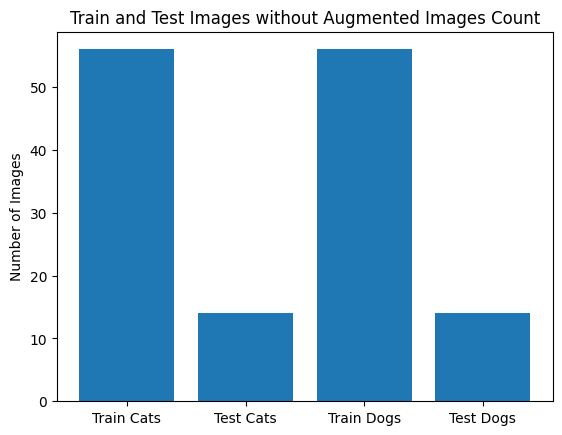

In [24]:
# plot the bar graph for the counts of train and test cats and dogs images

objects = ('Train Cats', 'Test Cats', 'Train Dogs', 'Test Dogs')
y_pos = np.arange(len(objects))
performance = [len(cats_train),len(cats_test),len(dogs_train),len(dogs_test)]
plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Number of Images')
plt.title('Train and Test Images without Augmented Images Count')
plt.show()


### Defining a function which takes the image and output path and will do 3 random augmentations on a certain image one after the other and will create an image with 3 augmentations which will act as train dataset for the resnet model in Task2

In [33]:
def augment_images(images_path, output_path):
    # Delete all existing images in the output directory before augmentation
    if os.path.exists(output_path):
        for file in os.listdir(output_path):
            file_path = os.path.join(output_path, file)
            if os.path.isfile(file_path) and file.lower().endswith(('.jpg', '.png', '.jpeg')):
                os.remove(file_path)
        print(f"Cleared existing images in {output_path}")

    # Making sure that the output directory exists
    os.makedirs(output_path, exist_ok=True)

    # List of 14 augmentation functions out of which 3 will get randomly selected for an image
    augmentation_ops = [
        imaugs.blur,
        imaugs.crop,
        imaugs.rotate,
        imaugs.scale,
        imaugs.random_noise,
        imaugs.grayscale,
        imaugs.opacity,
        imaugs.brightness,
        imaugs.contrast,
        imaugs.pixelization,
        imaugs.pad_square,
        imaugs.sharpen,
        imaugs.skew,
        imaugs.scale,
    ]

    # Getting the list of images
    image_files = sorted([f for f in os.listdir(images_path) if f.endswith(('.jpg', '.png', '.jpeg'))])

    #Taking the train set on which augmentation will happen
    for idx, filename in enumerate(image_files[:56]):
        input_file = os.path.join(images_path, filename)

        # Loading image using PIL
        try:
            image = Image.open(input_file)
        except Exception as e:
            print(f"Skipping {filename}: {e}")
            continue

        #As we want to double our dataset on each image we are doing 3 augmentations 2 times so that 2 new images will be generated
        for i in range(2):
            ops = random.sample(augmentation_ops, 3)  #  3 random augmentations are selected
            print(f"Applying {', '.join([op.__name__ for op in ops])} to {filename} (Augment {i+1})")

            # Applying the 3 selected augmentations one after the other
            augmented_image = image
            l=[]
            for op in ops:
                try:
                    augmented_image = op(augmented_image)  # Putting the augmentation
                    l.append(augmented_image)
                except Exception as e:
                    print(f"Error applying {op.__name__} to {filename}: {e}")
                    continue  # Skip to next operation if one fails


            # Saving the final augmented image in the output path defined
            output_file = os.path.join(output_path, f"aug_{i+1}_{filename}")
            augmented_image.save(output_file)



### Running the augmentation on the Train Cat dataset

In [15]:
augment_images('/content/drive/MyDrive/cats', '/content/drive/MyDrive/dataset_augmented/cats')

Cleared existing images in /content/drive/MyDrive/dataset_augmented/cats
Applying pad_square, crop, rotate to cat_1.jpg (Augment 1)
Applying skew, brightness, scale to cat_1.jpg (Augment 2)
Applying contrast, blur, skew to cat_106.jpg (Augment 1)
Applying random_noise, crop, grayscale to cat_106.jpg (Augment 2)
Applying pad_square, crop, rotate to cat_109.jpg (Augment 1)
Applying crop, random_noise, scale to cat_109.jpg (Augment 2)
Applying contrast, brightness, crop to cat_113.jpg (Augment 1)
Applying pixelization, skew, blur to cat_113.jpg (Augment 2)
Applying crop, blur, grayscale to cat_114.jpg (Augment 1)
Applying scale, brightness, pixelization to cat_114.jpg (Augment 2)
Applying skew, pixelization, blur to cat_116.jpg (Augment 1)
Applying sharpen, pad_square, pixelization to cat_116.jpg (Augment 2)
Applying sharpen, opacity, random_noise to cat_118.jpg (Augment 1)
Applying scale, rotate, crop to cat_118.jpg (Augment 2)
Applying scale, scale, pad_square to cat_119.jpg (Augment 1)

### Loading the Augmented Image of Cats and getting its count

In [16]:
folder_path = "/content/drive/MyDrive/dataset_augmented/cats"

# Get all image files (JPG, PNG, etc.)
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]



In [19]:
cat_aug_len=len(image_files) # Getting the count of augmented cat images

### Running the augmentation on the Train Dog dataset

In [18]:
augment_images('/content/drive/MyDrive/dogs', '/content/drive/MyDrive/dataset_augmented/dogs')

Cleared existing images in /content/drive/MyDrive/dataset_augmented/dogs
Applying pixelization, opacity, random_noise to dog_114.jpg (Augment 1)
Applying pad_square, pixelization, opacity to dog_114.jpg (Augment 2)
Applying scale, blur, pixelization to dog_123.jpg (Augment 1)
Applying opacity, pixelization, blur to dog_123.jpg (Augment 2)
Applying pixelization, scale, sharpen to dog_124.jpg (Augment 1)
Applying crop, pixelization, contrast to dog_124.jpg (Augment 2)
Applying sharpen, grayscale, opacity to dog_130.jpg (Augment 1)
Applying blur, scale, scale to dog_130.jpg (Augment 2)
Applying blur, opacity, pad_square to dog_141.jpg (Augment 1)
Applying scale, crop, pixelization to dog_141.jpg (Augment 2)
Applying pixelization, skew, contrast to dog_142.jpg (Augment 1)
Applying scale, sharpen, contrast to dog_142.jpg (Augment 2)
Applying blur, random_noise, pad_square to dog_147.jpg (Augment 1)
Applying blur, rotate, contrast to dog_147.jpg (Augment 2)
Applying blur, crop, scale to dog_

### Loading the Augmented Image of Dogs and getting its count

In [31]:
folder_path = "/content/drive/MyDrive/dataset_augmented/dogs"

# Get all image files (JPG, PNG, etc.)
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]



In [20]:
dog_aug_len=len(image_files)# Getting the count of augmented dog images

In [21]:
dog_aug_len

112

### Plotting Count of Augmented and Non-Augmented Images

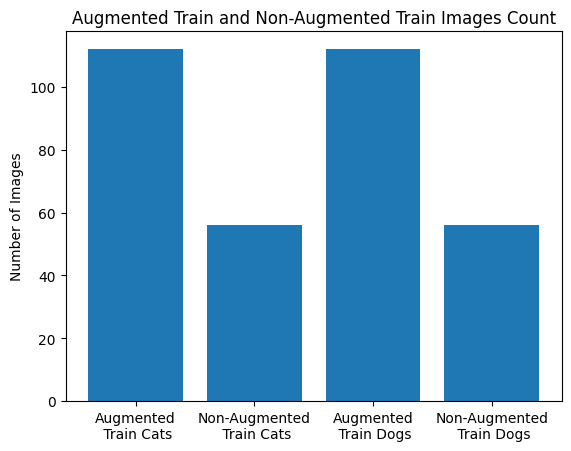

In [25]:
objects = ('Augmented\n Train Cats', 'Non-Augmented\n Train Cats', 'Augmented\n Train Dogs', 'Non-Augmented\n Train Dogs')
y_pos = np.arange(len(objects))
performance = [cat_aug_len,len(cats_train),dog_aug_len,len(dogs_train)]
plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Number of Images')
plt.title('Augmented Train and Non-Augmented Train Images Count')
plt.show()


### Plotting Train (Augmented +  Non-Augmented) and Test Images count

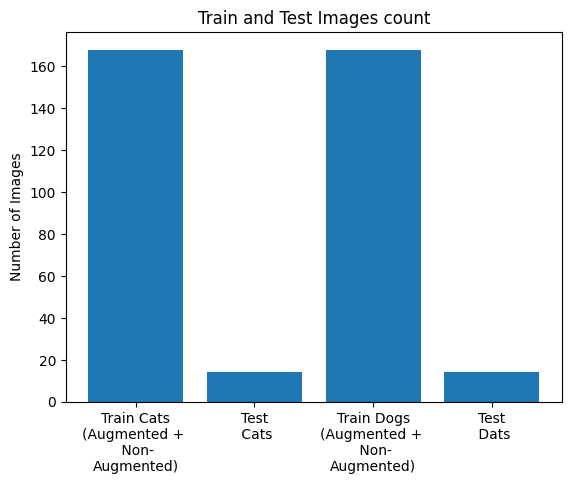

In [32]:
objects = ('Train Cats\n(Augmented + \n Non-\nAugmented)','Test\n Cats', 'Train Dogs\n(Augmented + \n Non-\nAugmented)','Test\n Dats')
y_pos = np.arange(len(objects))
performance = [cat_aug_len+len(cats_train),len(cats_test),dog_aug_len+len(dogs_train),len(dogs_test)]
plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Number of Images')
plt.title('Train and Test Images count')
plt.show()
